# Part II - Flights' Cancellation Data Exploration
## by (Bui Tuan Anh)


## Investigation Overview


> This presentation explores the flights dataset that reports cancelled flights in the United States with the reasons for cancellation from January 2007 to December 2007.

> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> The dataset has **7,453,215 flights** details with **29 features**. The data ranges from **Jan 1, 2007** to **December 15, 2007**.

> The **29 features** contains information about flights like **date**, **duration** (AirTime), **carrier**, **origin**, **destination**, **cancellation status** (and cause of cancellation), etc.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display
from datetime import datetime
from datetime import date
plt.style.use('seaborn')

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df_flights = pd.read_csv('2007.csv.bz2', compression="bz2")
df_carriers = pd.read_csv('carriers.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Proportion of cancelled flights

> Out of 7 million flights from Jan 2007 to December 2007, 160748 flights (2.16%) were cancelled.

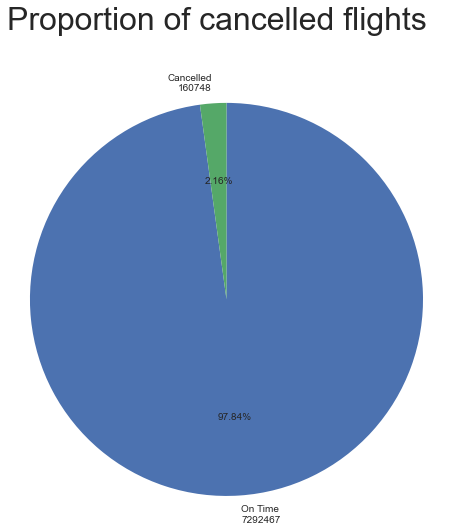

In [49]:
cancel_data = df_flights['Cancelled'].value_counts()

#plot
plt.figure(figsize=(10, 8))
labels = f'On Time\n{cancel_data.values[0]}', f'Cancelled\n{cancel_data.values[1]}'
plt.pie(cancel_data, labels = labels, startangle=90, counterclock=False, autopct='%.2f%%')
plt.axis('square');

#label, title
ax = plt.gca()
#ax.title.set_position([.5, 1.9])
plt.suptitle('Proportion of cancelled flights', size=32, y=1.01);  

## Distribution of Cancelled flights by reason

> In 2007 seem most of the cancelled flight is because of Carrier (41.54%).

> Very few flights are cancelled due to security reasons (0.02%)

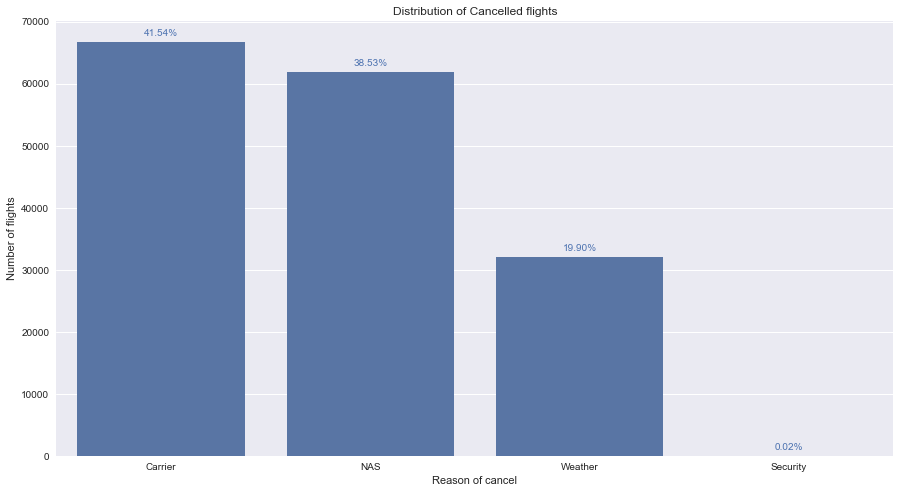

In [7]:
base_color = sb.color_palette()[0]
cancel_count = df_flights['CancellationCode'].count()
df_count = df_flights['CancellationCode'].value_counts()

#plot
plt.figure(figsize=(15, 8))
sb.countplot(data=df_flights, x='CancellationCode', color=base_color)
cancel_label = ['Carrier', 'NAS', 'Weather', 'Security']
locs, labels = plt.xticks()

#add annotation
for loc, label in zip(locs, labels):
    # get y position
    count = df_count[label.get_text()]
    annot_string = f'{100*count/cancel_count:0.2f}%'
    plt.text(loc, count + 1000, annot_string, ha = 'center', color = base_color)

#change x tick label
plt.xticks(locs, cancel_label);

#label, title
plt.ylabel('Number of flights')
plt.xlabel('Reason of cancel')
plt.title('Distribution of Cancelled flights');

## Proportion of Cancelled flights per Airline

> Southwest Airlines is the carrier have most flight but also have the percentage of cancelled highest. After is United Air Lines Inc. 

> From top 10, Delta Air Lines Inc is the carrier with lowest percentage of cancelled flight

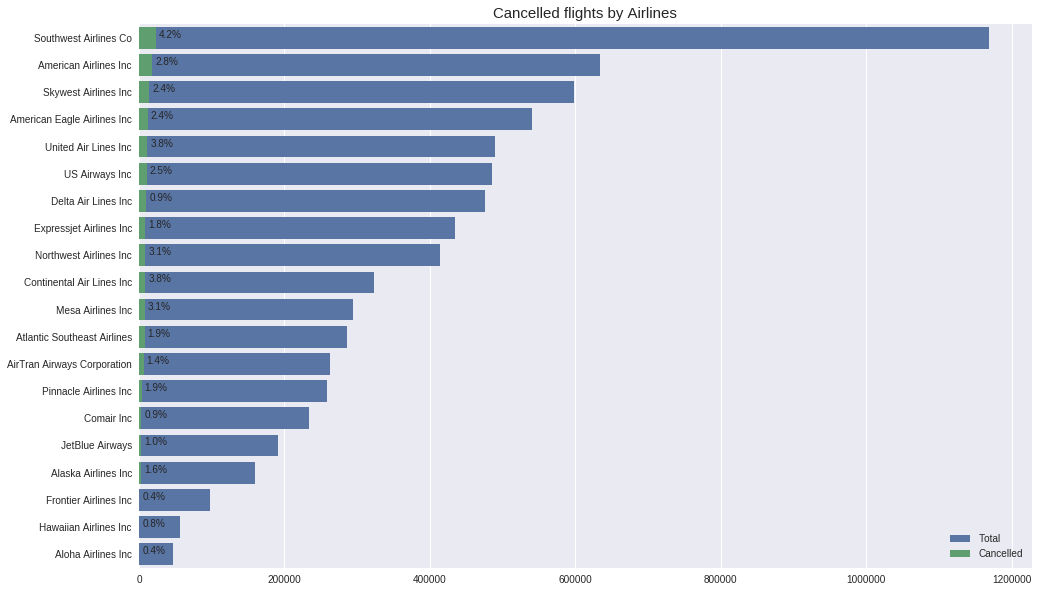

In [9]:
#get label of all carrier
label_carrier = []
carrier_order = df_flights['UniqueCarrier'].value_counts().index
for carrier in carrier_order:
    label_carrier.append(df_carriers[df_carriers['Code']==carrier].values[0][1].split('.')[0])
    
#count    
df_carrier_count = df_flights['UniqueCarrier'].value_counts()
df_cancelled_counts = df_flights[df_flights['Cancelled']==1]['UniqueCarrier'].value_counts()

# figure size
plt.figure(figsize=(16, 10))

#color
second_color = sb.color_palette()[1]

#plot
sb.barplot(y = df_carrier_count.index, x = df_carrier_count.values, order=df_carrier_count.index, label='Total', color=base_color)
sb.barplot(y = df_cancelled_counts.index, x = df_cancelled_counts.values, order=df_cancelled_counts.index, label='Cancelled', color=second_color)

#get location, tick labels
locs, labels = plt.yticks()

# add annotation
for loc, label in zip(locs, labels):
    count = df_carrier_count[label.get_text()]
    cancelled_count = df_cancelled_counts[label.get_text()]
    annotation_string = f'{100*cancelled_count/count:0.1f}%'
    plt.text( cancelled_count + 20000, loc, annotation_string, ha = 'center')

#legend, xticks
plt.legend()
plt.xticks(rotation=0)

# change y tick label
plt.yticks(locs, label_carrier);
plt.title('Cancelled flights by Airlines', fontsize=15);

## End of presentation